### Certificado Profesional de Ciencia de Datos de IBM

## PROYECTO FINAL

***Por Francisco A. Herrera González***

*El siguiente estudio pertenece a la asignación final del Certificado Profesional de Ciencia de Datos ofrecido por IBM
y es solo un ejercicio usado para calificar parte de las diferentes habilidades adquiridas a lo largo del curso, por tanto, sus conclusiones no tiene ningún tipo de validez divulgativa, sus datos, aunque reales, no son suficientes para completar un análisis económico verdadero, y no deberían ser usadas como guía para establecer un negocio en la ciudad.*

# ¿Qué negocio deberíamos montar en la ciudad de Lyon?

## 1. Descripción del problema y antecedentes:

Nuestra empresa ficticia de análisis de datos está ubicada en la ciudad de Lyon, en Francia. Una ciudad que durante mucho tiempo ha sido la segunda ciudad más importante de Francia en índices económicos y la tercera más importante en conceptos de población.

Es una ciudad con una fuerte tradición industrial, con muchas fábricas ubicadas al sur de la ciudad que destacan en sectores como la química o la farmacéutica y que en la última década, a raíz de varias remodelaciones importantes que han cambiado el aspecto de ciertas zonas de la ciudad, ha conseguido hacerse una cuota importante de turismo, siendo la segunda ciudad más visitada de Francia estos últimos años, solo por detrás de París. Además, Lyon cuenta con 3 universidades públicas y algunas prestigiosas escuelas privadas de enseñanza superior.

Con estos antecedentes, considero interesante proponer un caso en el que un cliente nos solicita un análisis de la economía lyonesa de cara a verificar los sectores que mejor proliferan en esta ciudad, qué tipo de industria, qué tipo de servicios, etc., para, desde el punto de vista de una posible inversión, poder **determinar qué idea de negocio sería rentable y segura en una ciudad con estas características.**

## 2. Descripción de los datos:

Intentaremos responder a esta pregunta a través de la recopilación de datos geográficos, económicos y demográficos de la región:


- Para los datos económicos, analizaremos los informes anuales que emite la Cámara de Comercio de la Región: https://www.lyon-metropole.cci.fr/. Con estos datos, podremos hacernos una idea de cómo está estructurada la economía lyonesa, es decir, en qué está basada su industria, su sector servicios, etc. Esperamos con estos datos orientar nuestras decisiones hacia una u otra vertiente, dependiendo del éxito de dichos sectores en la ciudad.


- Usaremos FourSquare para hacer un análisis exhaustivo de los tipos de negocio que podemos encontrar en cada distrito de Lyon. 


- El archivo JSON lo extraeremos de la web de datos del gobiernos francés: https://www.data.gouv.fr/es/datasets/territoire-de-la-metropole-de-lyon/#, además, para hacer una división concreta de los distritos de Lyon, acudiremos a las tablas que podemos encontrar, por ejemplo, en Wikipedia: https://fr.wikipedia.org/wiki/Arrondissements_de_Lyon, o a través de un proovedor público de datos geoespaciales como: https://france-geojson.gregoiredavid.fr/


- Para las tablas demográficas nos dirigiremos a la web del Instituto Regional de Estadística correspondiente, donde podremos hacernos una idea de qué tipo de población habita Lyon: https://www.insee.fr/fr/recherche?q=lyon&debut=0. Accediendo a estas tablas podemos obtener diferentes datos descriptivos de la población, como la edad media (podemos comprobar si se trata de una población envejecida, o al contrario), el índice de población activa, estudiantes, etc. De manera que podamos trazar varios perfiles de clientes.


- Para otro tipo de datos, como por ejemplo, los sectores en alza, o las preferencias de los consumidores, es posible que consultemos también estadística no tabulada, como noticias de prensa, blogs especializados en economía, etc.



## 3. Metodología:

La metodología debemos dividirla en 3 variantes principales: 

- Un análisis geográfico que nos permita centralizar el punto de investigación en la ciudad de Lyon y sus distritos centrales, descartando los alrededores de la ciudad (conocido como 'Grand Lyon').


- Un análisis económico que nos permitar clasificar los diferentes sectores y así hacernos una idea aproximativa de qué está compuesta la economía lyonesa de cara a descartar o priorizar diferentes ideas de negocio.


- Un análisis demográfico que nos permita trazar un perfil poblacional de cara a ajustar la posible creación de uno u otro negocio.

### 3.1. Análisis geográfico: 

Crearemos algunas tablas que expliquen la situación geográfica de Lyon y sus municipios; cuántos distritos tiene, cuántos habitantes tiene cada distrito, qué superficie ocupa cada uno, así como el total de habitantes y de hectáreas (en 2015). Por otro lado, estableceremos la posición de Lyon en el mapa y visualizaremos sus barrios de manera interactiva.

Con este análisis geográfico esperamos establecer una descripción general y una ubicación precisa de cada uno de los distritos en el mapa que nos permita hacernos una imagen de Lyon y sus distritos de cara al análisis económico y las posibles conclusiones.

In [1]:
# Importamos las bibliotecas que usaremos para el proyecto:

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from pandas.io.json import json_normalize
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
from IPython.display import JSON
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import requests
import urllib3
import seaborn as sns


In [2]:
# Vamos a exportar la tabla de vecindarios de Lyon y formatearla a nuestro interés:
# 1º Extraemos el archivo de la fuente (en este caso Wikipedia)
WikiLyon = pd.read_html('https://fr.wikipedia.org/wiki/Arrondissements_de_Lyon', header=0)
WikiLyon

[   Code Insee  Code Postal      Arrondissement  \
 0       69381        69001  1er arrondissement   
 1       69382        69002   2e arrondissement   
 2       69383        69003   3e arrondissement   
 3       69384        69004   4e arrondissement   
 4       69385        69005   5e arrondissement   
 5       69386        69006   6e arrondissement   
 6       69387        69007   7e arrondissement   
 7       69388        69008   8e arrondissement   
 8       69389        69009   9e arrondissement   
 
                                     Date de création Population (2015)[2]  \
 0                                       24 mars 1852               29 551   
 1                                       24 mars 1852               30 436   
 2  24 mars 1852 (ancienne commune de La Guillotière)              101 882   
 3  24 mars 1852(ancienne commune de La Croix-Rousse)               36 145   
 4  24 mars 1852(comprenait à l'origine l'ancienne...               48 182   
 5    17 juillet 186

In [3]:
# Comprobemos si al leer la página encontramos solo una tabla o varias:

print(F'Número de tablas: {len(WikiLyon)}')

Número de tablas: 2


In [4]:
# Como hay dos tablas, comprobemos las primeras líneas de cada una para determinar cuál es la que necesitamos:

for i in range (len(WikiLyon)):
    print(WikiLyon[i].head(2))

   Code Insee  Code Postal      Arrondissement Date de création  \
0       69381        69001  1er arrondissement     24 mars 1852   
1       69382        69002   2e arrondissement     24 mars 1852   

  Population (2015)[2] Population (2011) Population (2006) Population (1999)  \
0               29 551            28 932            28 210            26 868   
1               30 436            30 575            30 276            27 977   

  Population (1990) Population (1982) Population (1975) Population (1968)  \
0            26 570            25 600            31 187            41 200   
1            28 602            29 324            34 416            42 900   

   Superficie (ha) Densité (hab./km²) (2015)  
0              151                    19 570  
1              341                     8 926  
                        v · mArrondissements de Lyon  \
0  .mw-parser-output .sep-liste{font-weight:bold}...   
1  Administration de Lyon · Quartiers de Lyon · L...   

               

In [5]:
# Vemos que es la primera tabla la que nos interesa, hagamos un dataframe con ella:

Lyon_districts = WikiLyon[0]
Lyon_districts

,Code Insee,Code Postal,Arrondissement,Date de création,Population (2015)[2],Population (2011),Population (2006),Population (1999),Population (1990),Population (1982),Population (1975),Population (1968),Superficie (ha),Densité (hab./km²) (2015)
0,69381,69001,1er arrondissement,24 mars 1852,29 551,28 932,28 210,26 868,26 570,25 600,31 187,41 200,151,19 570
1,69382,69002,2e arrondissement,24 mars 1852,30 436,30 575,30 276,27 977,28 602,29 324,34 416,42 900,341,8 926
2,69383,69003,3e arrondissement,24 mars 1852 (ancienne commune de La Guillotière),101 882,97 662,88 755,82 568,70 278,65 105,74 402,88 800,635,16 044
3,69384,69004,4e arrondissement,24 mars 1852(ancienne commune de La Croix-Rousse),36 145,35 654,34 302,33 797,30 555,30 677,33 204,39 700,293,12 336
4,69385,69005,5e arrondissement,24 mars 1852(comprenait à l'origine l'ancienne...,48 182,46 698,47 330,46 985,46 071,47 372,48 735,50 400,623,7 734
5,69386,69006,6e arrondissement,17 juillet 1867(détachement d'une partie du 3e),50 596,48 794,49 965,48 167,47 664,48 958,52 590,68 600,377,13 421 (sans le Parc de la Tête d'or : 19 460)
6,69387,69007,7e arrondissement,8 mars 1912(détachement d'une partie du 3e),81 480,73 713,69 331,61 743,53 860,52 119,57 121,62 200,975,8 357
7,69388,69008,8e arrondissement,9 février 1959(détachement d'une partie du 7e),85 229,80 809,76 323,70 317,64 763,65 773,71 222,77 100,667,12 778
8,69389,69009,9e arrondissement,12 août 1964(détachement d'une partie du 5e (l...,49 774,48 431,47 813,47 030,47 124,48 167,53 839,56 900,725,6 865


In [6]:
# Vemos que hay ciertos datos, como la fecha de creación del distrito, o el número de habitantes hace 40 años, 
# que no son muy relevantes de cara al análisis, por tanto eliminemos las columnas que no nos interesan:

Lyon_districts.drop(['Code Insee', 
                     'Date de création', 
                     'Population (1999)', 
                     'Population (1990)', 
                     'Population (1982)', 
                     'Population (1975)', 
                     'Population (1968)'], 
                    axis=1, inplace=True)
Lyon_districts


,Code Postal,Arrondissement,Population (2015)[2],Population (2011),Population (2006),Superficie (ha),Densité (hab./km²) (2015)
0,69001,1er arrondissement,29 551,28 932,28 210,151,19 570
1,69002,2e arrondissement,30 436,30 575,30 276,341,8 926
2,69003,3e arrondissement,101 882,97 662,88 755,635,16 044
3,69004,4e arrondissement,36 145,35 654,34 302,293,12 336
4,69005,5e arrondissement,48 182,46 698,47 330,623,7 734
5,69006,6e arrondissement,50 596,48 794,49 965,377,13 421 (sans le Parc de la Tête d'or : 19 460)
6,69007,7e arrondissement,81 480,73 713,69 331,975,8 357
7,69008,8e arrondissement,85 229,80 809,76 323,667,12 778
8,69009,9e arrondissement,49 774,48 431,47 813,725,6 865


**A la vista de esta tabla, podemos extraer algunas conclusiones preliminares respecto al formato de los datos:**

Lo primero que los títulos de las columnas están en francés, tendremos que cambiarlos al inglés.

Vemos que la densidad del 6º arrondissement tiene dos valores (sin y con el parque), tendremos que armonizarlos a un valor.

Vemos que nos falta un valor clave, que son las coordenadas de cada distrito, tendremos que hallarlas y concatenarlas al dataframe también.


In [7]:
# Cambiamos los nombres:

Lyon_districts.rename(columns={'Arrondissement': 'District',
                              'Population (2015)[2]': 'Population 2015',
                              'Population (2011)' : 'Population 2011',
                              'Population (2006)': 'Population 2006',
                              'Superficie (ha)': 'Area (ha)',
                              'Densité (hab./km²) (2015)': 'Population Density 2015 (inhab / km2)'}, inplace=True)

In [8]:
#Comprobamos si los cambios se han producido adecuadamente:

Lyon_districts.head(2)

,Code Postal,District,Population 2015,Population 2011,Population 2006,Area (ha),Population Density 2015 (inhab / km2)
0,69001,1er arrondissement,29 551,28 932,28 210,151,19 570
1,69002,2e arrondissement,30 436,30 575,30 276,341,8 926


In [9]:
# Armonicemos ahora el valor de la columna Population Density:

#Localizamos el valor:

Lyon_districts.iloc[5,6]

"13\xa0421 (sans le Parc de la Tête d'or\xa0: 19\xa0460)"

In [10]:
# Lo especificamos por el area sin el parque:

Lyon_districts.iloc[5,6] = 13421

In [11]:
Lyon_districts.iloc[5,6]

13421

In [12]:
# Comprobemos si el cambio ha sido efectuado en el dataframe:

Lyon_districts

,Code Postal,District,Population 2015,Population 2011,Population 2006,Area (ha),Population Density 2015 (inhab / km2)
0,69001,1er arrondissement,29 551,28 932,28 210,151,19 570
1,69002,2e arrondissement,30 436,30 575,30 276,341,8 926
2,69003,3e arrondissement,101 882,97 662,88 755,635,16 044
3,69004,4e arrondissement,36 145,35 654,34 302,293,12 336
4,69005,5e arrondissement,48 182,46 698,47 330,623,7 734
5,69006,6e arrondissement,50 596,48 794,49 965,377,13421
6,69007,7e arrondissement,81 480,73 713,69 331,975,8 357
7,69008,8e arrondissement,85 229,80 809,76 323,667,12 778
8,69009,9e arrondissement,49 774,48 431,47 813,725,6 865


Vamos a crear también un dataframe con el valor total para las columnas de población 2015 y área, de cara a posibles cálculos futuros:

In [13]:
# Primero analizamos los tipos de datos que componen el DataFrame:
Lyon_districts.dtypes


Code Postal                               int64
District                                 object
Population 2015                          object
Population 2011                          object
Population 2006                          object
Area (ha)                                 int64
Population Density 2015 (inhab / km2)    object
dtype: object

Podemos ver que la mayoría de columnas son tipo 'object', hay que cambiarlas a tipo 'int' si queremos hacer cálculos con ellas:

In [14]:
Lyon_districts['Population 2015'].astype('int')

ValueError: invalid literal for int() with base 10: '29\xa0551'

Como podemos ver, cuando intentamos cambiar el tipo a numérico nos da error, puesto que la string del número incluye también valores no numéricos. En este caso podemos ver que se usa el valor '\xa0' para el carácter correspondiente a la barra de espacio. Sustituyamos dichos valores:

In [15]:
# Vemos que tenemos algunos datos numéricos como 'objeto', pasémoslos a un "int":

Lyon_districts['Population 2015'].replace(['29\xa0551','30\xa0436', '101\xa0882', '36\xa0145', '48\xa0182', '50\xa0596', '81\xa0480', '85\xa0229', '49\xa0774'], 
                                          [29551, 30436, 101882, 36145, 48182, 50596, 81480, 85229, 49774], inplace=True)
Lyon_districts['Population 2011'].replace(['28\xa0932', '30\xa0575', '97\xa0662', '35\xa0654', '46\xa0698', '48\xa0794', '73\xa0713', '80\xa0809', '48\xa0431'],
                                         [28932, 30575, 97662, 35654, 46698, 48794, 73713, 80809, 48431], inplace=True)
Lyon_districts['Population 2006'].replace(['28\xa0210', '30\xa0276', '88\xa0755', '34\xa0302', '47\xa0330', '49\xa0965', '69\xa0331', '76\xa0323', '47\xa0813'],
                                         [28210, 30276, 88755, 34302, 47330, 49965, 69331, 76323, 47813], inplace=True)
Lyon_districts['Population Density 2015 (inhab / km2)'].replace(['19\xa0570', '8\xa0926', '16\xa0044', '12\xa0336', '7\xa0734', '13421', '8\xa0357', '12\xa0778', '6\xa0865'],
                                                               [19570, 8926, 16044, 12336, 7734, 13421, 8357, 12778, 6865], inplace=True)

In [16]:
Lyon_districts.dtypes

Code Postal                               int64
District                                 object
Population 2015                           int64
Population 2011                           int64
Population 2006                           int64
Area (ha)                                 int64
Population Density 2015 (inhab / km2)     int64
dtype: object

Hemos cambiado los valores satisfactoriamente. Procedamos ahora a crear un nuevo dataframe con los totales:

In [17]:
Total_values = { 'Total Population 2015': [Lyon_districts['Population 2015'].sum()],
               'Total Area (ha)': [Lyon_districts['Area (ha)'].sum()]}

Lyon_totals2015 = pd.DataFrame(Total_values)
Lyon_totals2015

,Total Population 2015,Total Area (ha)
0,513275,4787


Una vez tenemos la tabla con los diferentes distritos y sus valores, pasemos a recopilar las coordenadas de cada uno de las zonas en las que está dividida la ciudad. Para ello, se ha descargado un archivo JSON a través de la web de datos del gobierno francés con los datos geoespaciales de los diferentes distritos, sin embargo, al abrirlo, vimos que dicho archivo poseía las coordenadas a nivel poligonal, y armonizar dicho JSON nos ralentizaría y haría la intepretación de los datos un poco más dificultosa. Es por esto que vamos a importar el módulo de geopy 'ArcGIS', que nos permite obtener las coordenadas de un lugar especificando su dirección:

In [18]:
from geopy.geocoders import ArcGIS

In [19]:
Lyon_districtsDIC = Lyon_districts['District'].to_list()
Lyon_districtsDIC

['1er\xa0arrondissement',
 '2e\xa0arrondissement',
 '3e\xa0arrondissement',
 '4e\xa0arrondissement',
 '5e\xa0arrondissement',
 '6e\xa0arrondissement',
 '7e\xa0arrondissement',
 '8e\xa0arrondissement',
 '9e\xa0arrondissement']

In [20]:
# Creamos la instancia:
arcg = ArcGIS()
subdist_coord = {}

# Definimos la función que va a hacer la consulta:

def get_coord_lyon(addr):
    'Recibe una dirección y devuelve un diccionario con sus coordenadas'
    dic = {}
    for i in addr:
        try:
            location = arcg.geocode(i+", Lyon")
            print(i, "consultado, retorno:", location[0])
            dic[i] = location[1]
        except Exception as E:
            print("ERROR en:", i, E)
    print("Consulta completa, total consultas:", len(addr))
    return dic

Lyon_coord = get_coord_lyon(Lyon_districtsDIC)
Lyon_coord
            

1er arrondissement consultado, retorno: 1er Arrondissement, Lyon, Rhône, Auvergne-Rhône-Alpes
2e arrondissement consultado, retorno: 2e Arrondissement, Lyon, Rhône, Auvergne-Rhône-Alpes
3e arrondissement consultado, retorno: 3e Arrondissement, Lyon, Rhône, Auvergne-Rhône-Alpes
4e arrondissement consultado, retorno: 4e Arrondissement, Lyon, Rhône, Auvergne-Rhône-Alpes
5e arrondissement consultado, retorno: 5e Arrondissement, Lyon, Rhône, Auvergne-Rhône-Alpes
6e arrondissement consultado, retorno: 6e Arrondissement, Lyon, Rhône, Auvergne-Rhône-Alpes
7e arrondissement consultado, retorno: 7e Arrondissement, Lyon, Rhône, Auvergne-Rhône-Alpes
8e arrondissement consultado, retorno: 8e Arrondissement, Lyon, Rhône, Auvergne-Rhône-Alpes
9e arrondissement consultado, retorno: 9e Arrondissement, Lyon, Rhône, Auvergne-Rhône-Alpes
Consulta completa, total consultas: 9


{'1er\xa0arrondissement': (45.76852000000008, 4.831870000000038),
 '2e\xa0arrondissement': (45.75917000000004, 4.829650000000072),
 '3e\xa0arrondissement': (45.758980000000065, 4.861140000000034),
 '4e\xa0arrondissement': (45.77613000000008, 4.829490000000021),
 '5e\xa0arrondissement': (45.756380000000036, 4.797370000000058),
 '6e\xa0arrondissement': (45.76934000000006, 4.850150000000042),
 '7e\xa0arrondissement': (45.74666000000008, 4.842440000000067),
 '8e\xa0arrondissement': (45.73545000000007, 4.872340000000065),
 '9e\xa0arrondissement': (45.774110000000064, 4.805390000000045)}

In [21]:
# Vamos a pasar este diccionario a DataFrame para poder manipularlo:

Lyon_coordDF = pd.DataFrame.from_dict(Lyon_coord, orient='index', columns=['Latitude','Longitude'])
Lyon_coordDF

,Latitude,Longitude
1er arrondissement,45.76852,4.83187
2e arrondissement,45.75917,4.82965
3e arrondissement,45.75898,4.86114
4e arrondissement,45.77613,4.82949
5e arrondissement,45.75638,4.79737
6e arrondissement,45.76934,4.85015
7e arrondissement,45.74666,4.84244
8e arrondissement,45.73545,4.87234
9e arrondissement,45.77411,4.80539


In [22]:
# Borramos la columna index y lo unimos al dataframe de los Distritos:

Lyon_coordDF.reset_index(inplace=True)

Lyon_coordDF = Lyon_coordDF.drop(['index'],axis=1)

Lyon_coordDF

,Latitude,Longitude
0,45.76852,4.83187
1,45.75917,4.82965
2,45.75898,4.86114
3,45.77613,4.82949
4,45.75638,4.79737
5,45.76934,4.85015
6,45.74666,4.84244
7,45.73545,4.87234
8,45.77411,4.80539


In [23]:
Lyon_dataDF = pd.concat([Lyon_districts, Lyon_coordDF], axis=1)

Lyon_dataDF

,Code Postal,District,Population 2015,Population 2011,Population 2006,Area (ha),Population Density 2015 (inhab / km2),Latitude,Longitude
0,69001,1er arrondissement,29551,28932,28210,151,19570,45.76852,4.83187
1,69002,2e arrondissement,30436,30575,30276,341,8926,45.75917,4.82965
2,69003,3e arrondissement,101882,97662,88755,635,16044,45.75898,4.86114
3,69004,4e arrondissement,36145,35654,34302,293,12336,45.77613,4.82949
4,69005,5e arrondissement,48182,46698,47330,623,7734,45.75638,4.79737
5,69006,6e arrondissement,50596,48794,49965,377,13421,45.76934,4.85015
6,69007,7e arrondissement,81480,73713,69331,975,8357,45.74666,4.84244
7,69008,8e arrondissement,85229,80809,76323,667,12778,45.73545,4.87234
8,69009,9e arrondissement,49774,48431,47813,725,6865,45.77411,4.80539


Ya tenemos la tabla con todos sus datos armonizados, así como con aquellos datos que faltaban, como las coordenadas. Con esto pues, podemos elaborar un mapa de Lyon con una señalización en cada uno de sus distritos:

In [24]:
# Vamos a elaborar el mapa a través de geopy:

from geopy.geocoders import Nominatim

In [25]:
address = 'Lyon, France'

geolocator = Nominatim(user_agent='fr_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('Las coordenadas de la ciudad de Lyon son {}, {}.'.format(latitude, longitude))

Las coordenadas de la ciudad de Lyon son 45.7578137, 4.8320114.


In [26]:
# Generamos el mapa usando los valores anteriores:

Lyon_map = folium.Map(location=[latitude, longitude], zoom_start = 13)
Lyon_map

In [27]:
# Ahora vamos a añadir los marcadores para cada distrito:

for lat, lng, district in zip(Lyon_dataDF['Latitude'], Lyon_dataDF['Longitude'], Lyon_dataDF['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=10,
    popup=label,
    color='white',
    fill=True,
    fill_color='2283F0',
    fill_opacity=0.6,
    parse_html=False).add_to(Lyon_map)
    
Lyon_map

Ya tenemos una tabla explicativa con los principales datos de la ciudad y un mapa que nos permite ubicar interactivamente el centro geográfico de cada uno de los distritos de la ciudad de Lyon. De esta manera, ya podemos identificar qué distrito tiene mayor superficie, qué distrito tiene mayor número de habitantes, etc., y, a través del mapa interactivo, podemos establecer la posición geográfica de cada distrito. 

Ahora que tenemos dichos datos y hemos sido capaces de ubicar Lyon y sus distritos en el mapa, podemos hacer un análisis económico de los distritos anteriormente reprensentados.



### 3.2. Análisis económico:

El análisis económico de los diferentes distritos de la ciudad lo dividiremos en dos partes:

- Primero analizaremos los diferentes negocios de cada distrito a través de FourSquare, así podremos determinar de qué se compone el tejido empresarial de cada uno de los distritos, así como los lugares de interés, lugares de moda, sector predominante, etc., luego, los agruparemos y representaremos esta agrupación en el mapa.


- En segundo lugar, accederemos a algunos datos históricos que publica la Cámara de Comercio regional, haremos un análisis breve de los sectores económicos más fuertes en la región e intentaremos extrapolar los valores para la ciudad de Lyon, de cara a identificar posibles nichos de mercado, sectores especialmente seguros para la inversión, etc.

Al final de este análisis esperamos poder identificar o bien un sector en una posición estratégica, o bien un sector cuya rentabilidad de sea segura.

In [28]:
# Primero vamos a defenir la versión y las credenciales de FourSquare:

CLIENT_ID = '2FXV4YUCJ0EIYRAJI022BQNSYAHD42GRAOALJYSLMSH5VIMK'
CLIENT_SECRET = 'SPDKXEYGNGLJGQWNG5OPCC50EYTNB3JXLC0CO1B4DOVKVN4E'
VERSION = '20180605'


print('Credenciales:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credenciales:
CLIENT_ID: 2FXV4YUCJ0EIYRAJI022BQNSYAHD42GRAOALJYSLMSH5VIMK
CLIENT_SECRET:SPDKXEYGNGLJGQWNG5OPCC50EYTNB3JXLC0CO1B4DOVKVN4E


In [29]:
# Recordemos que las coordenadas de la ciudad de Lyon son: 

Lyon_lat = 45.7578137 
Lyon_lon = 4.8320114

# Establezcamos primero la API para un radio de 1,5 km y una muestra de 150 lugares, y luego iteremos para obtener los valores de cada uno de los distritos:

LIMIT = 150
radius = 1500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    Lyon_lat,
    Lyon_lon,
    radius,
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=2FXV4YUCJ0EIYRAJI022BQNSYAHD42GRAOALJYSLMSH5VIMK&client_secret=SPDKXEYGNGLJGQWNG5OPCC50EYTNB3JXLC0CO1B4DOVKVN4E&v=20180605&ll=45.7578137,4.8320114&radius=1500&limit=150'

In [30]:
# Enviamos la solicitud GET y examinamos los resultados:

resultados = requests.get(url).json()
resultados

{'meta': {'code': 200, 'requestId': '60784369587a5154fdfa6521'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bellecour - Salla',
  'headerFullLocation': 'Bellecour - Salla, Lyon',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 193,
  'suggestedBounds': {'ne': {'lat': 45.771313713500014,
    'lng': 4.851324782697176},
   'sw': {'lat': 45.744313686499986, 'lng': 4.812698017302823}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b5e0a3df964a520817a29e3',
       'name': 'Place Bellecour',
       'location': {'address': 'Place Bellecour',
        'lat': 45.757523270000576,
        'lng': 4.832396507263184,
        'labeledLatLngs': [{'label': 'display',
        

In [31]:
# Vamos a extraer la categoría de cada sitio:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [32]:
# Limpiamos el objeto JSON y los estructuramos en un DataFrame:

venues = resultados['response']['groups'][0]['items']

lugares_cercanos = pd.json_normalize(venues)

# Filtramos las columnas que nos interesan. En este caso, el codigo postal, que nos permite ubicarnos en cada uno de los distritos,
# el nombre del lugar, la categoría y las coordenadas:

filtered_columns = ['venue.name', 'venue.categories'] + [col for col in lugares_cercanos.columns if col.startswith('venue.location.')] + ['venue.id']

lugares_cercanos = lugares_cercanos.loc[:, filtered_columns]

lugares_cercanos['venue.categories'] = lugares_cercanos.apply(get_category_type, axis=1)
# Limpiamos las columnas:

lugares_cercanos.columns = [col.split(".")[-1] for col in lugares_cercanos.columns]

# Revisamos una muestra del DataFrame resultante:

lugares_cercanos.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,crossStreet,id
0,Place Bellecour,Plaza,Place Bellecour,45.757523,4.832397,"[{'label': 'display', 'lat': 45.75752327000057...",44,69002,FR,Lyon,Rhône-Alpes,France,"[Place Bellecour, 69002 Lyon, France]",NaN,NaN,4b5e0a3df964a520817a29e3
1,Place des Célestins,Plaza,Place des Celestins,45.759804,4.831842,"[{'label': 'display', 'lat': 45.75980350342357...",221,69002,FR,Lyon,Rhône-Alpes,France,"[Place des Celestins, 69002 Lyon, France]",NaN,NaN,4b61bb38f964a5203f1f2ae3
2,Place des Jacobins,Plaza,Place des Jacobins,45.760489,4.833636,"[{'label': 'display', 'lat': 45.76048866298726...",323,69002,FR,Lyon,Rhône-Alpes,France,"[Place des Jacobins, 69002 Lyon, France]",NaN,NaN,4b61baf8f964a520361f2ae3
3,Raconte-moi la Terre,Café,14 rue du Plat,45.758048,4.829078,"[{'label': 'display', 'lat': 45.75804790080588...",229,69002,FR,Lyon,Rhône-Alpes,France,"[14 rue du Plat, 69002 Lyon, France]",Bellecour - Salla,NaN,4bc44daf4cdfc9b68a689821
4,Slake Coffee House,Café,9 rue de l'ancienne Préfecture,45.760922,4.832910,"[{'label': 'display', 'lat': 45.76092190900755...",352,69002,FR,Lyon 02,Rhône-Alpes,France,"[9 rue de l'ancienne Préfecture, 69002 Lyon 02...",NaN,NaN,5602838f498e9111e2522df3


Una vez depurado el JSON y obtenidas las categorías, pasemos a obtener la lista filtrada de los lugares cercanos para cada distrito de la ciudad:

In [33]:
# Definimos la función:

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # Definimos la URL para la llamada a la API:
        
        url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # Solicitud GET:
        
        resultados1 = requests.get(url1).json()["response"]["groups"][0]['items']
        
        # Definimos que nos devuelva sólo información relevante:
        
        venues_list.append([(name, lat, lng,
                            v['venue']['name'],
                            v['venue']['location']['lat'],
                            v['venue']['location']['lng'],
                            v['venue']['categories'][0]['name']) for v in resultados1])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District',
                             'District Latitude',
                             'District Longitude',
                            'Venue',
                            'Venue Latitude',
                            'Venue Longitude',
                            'Venue Category']
    
    return(nearby_venues)

Ahora hacemos una consulta para cada uno de los distritos de Lyon:

In [34]:
Lyon_disvenues = getNearbyVenues(names = Lyon_dataDF['District'],
                                 latitudes = Lyon_dataDF['Latitude'],
                                 longitudes = Lyon_dataDF['Longitude'],
                                 radius = 1000)

Lyon_disvenues.head(15)

1er arrondissement
2e arrondissement
3e arrondissement
4e arrondissement
5e arrondissement
6e arrondissement
7e arrondissement
8e arrondissement
9e arrondissement


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1er arrondissement,45.76852,4.83187,Place des Terreaux,45.767506,4.833491,Plaza
1,1er arrondissement,45.76852,4.83187,Hopstore,45.768267,4.830576,Bar
2,1er arrondissement,45.76852,4.83187,Hello Brooklyn,45.768373,4.834405,Donut Shop
3,1er arrondissement,45.76852,4.83187,Le Tasse Livre,45.768711,4.830788,Café
4,1er arrondissement,45.76852,4.83187,La Taverne du Perroquet Bourré,45.768217,4.833717,Bar
5,1er arrondissement,45.76852,4.83187,Musée des Beaux-Arts,45.766772,4.833712,Art Museum
6,1er arrondissement,45.76852,4.83187,Bangkok royal,45.768773,4.831194,Thai Restaurant
7,1er arrondissement,45.76852,4.83187,Fresque des Lyonnais,45.768189,4.828085,Public Art
8,1er arrondissement,45.76852,4.83187,Archange,45.768395,4.830536,French Restaurant
9,1er arrondissement,45.76852,4.83187,Doma,45.766739,4.831806,Japanese Restaurant


In [35]:
Lyon_disvenues.tail(15)

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
611,9e arrondissement,45.77411,4.80539,Place Valmy,45.775072,4.805404,Plaza
612,9e arrondissement,45.77411,4.80539,Métro Valmy Ⓓ,45.774752,4.805542,Metro Station
613,9e arrondissement,45.77411,4.80539,O Jardin,45.771998,4.803998,Restaurant
614,9e arrondissement,45.77411,4.80539,Maison Pozzoli,45.768250,4.805416,Bakery
615,9e arrondissement,45.77411,4.80539,Place de la Rhodiaceta,45.771018,4.807259,Plaza
616,9e arrondissement,45.77411,4.80539,Théâtre Nouvelle Génération,45.777378,4.803269,Theater
617,9e arrondissement,45.77411,4.80539,Place de Paris,45.779466,4.804255,Plaza
618,9e arrondissement,45.77411,4.80539,Gare SNCF de Lyon-Vaise,45.781082,4.804823,Train Station
619,9e arrondissement,45.77411,4.80539,PIXEL,45.776396,4.796766,Electronics Store
620,9e arrondissement,45.77411,4.80539,Arrêt Gare de Vaise (6),45.780830,4.804478,Bus Stop


Analizando el dataframe vemos que hay respuestas que no aportan información de ningún tipo al estudio: Plazas, parques... Por tanto, antes de proceder con la metodología habría que identificar y descartar las filas correspondientes.

In [36]:
# Veamos el tamaño del DataFrame:

print('El tamaño del DataFrame es:', Lyon_disvenues.shape)

El tamaño del DataFrame es: (626, 7)


In [37]:
print('Hay {} tipos de negocio / lugares en el DataFrame.'.format(len(Lyon_disvenues['Venue Category'].unique())))

Hay 126 tipos de negocio / lugares en el DataFrame.


In [38]:
# Veamos también qué categorías de lugares hay en el dataframe:

Lyon_disvenues['Venue Category'].unique().tolist()

['Plaza',
 'Bar',
 'Donut Shop',
 'Café',
 'Art Museum',
 'Thai Restaurant',
 'Public Art',
 'French Restaurant',
 'Japanese Restaurant',
 'Cocktail Bar',
 'Falafel Restaurant',
 'Coffee Shop',
 'City Hall',
 'Fast Food Restaurant',
 'Steakhouse',
 'Bookstore',
 'Opera House',
 'Lyonese Bouchon',
 'Wine Bar',
 'Italian Restaurant',
 'Pub',
 'Neighborhood',
 'Ice Cream Shop',
 'Gourmet Shop',
 'Bridge',
 'Hostel',
 'Pedestrian Plaza',
 'Farmers Market',
 'Beer Bar',
 'Church',
 'Museum',
 'Lebanese Restaurant',
 'Burger Joint',
 'Lounge',
 'Cupcake Shop',
 'Hotel',
 'Video Game Store',
 'Tapas Restaurant',
 'Seafood Restaurant',
 'Bakery',
 'Theater',
 'Optical Shop',
 'Dessert Shop',
 'Bagel Shop',
 'Trail',
 'Restaurant',
 'Resort',
 'Park',
 'Scenic Lookout',
 'Sushi Restaurant',
 'Hotel Bar',
 'Theme Park',
 'Road',
 'Clothing Store',
 'Historic Site',
 'Vietnamese Restaurant',
 'Garden',
 'Tea Room',
 'Comedy Club',
 'Electronics Store',
 'Mexican Restaurant',
 'Modern European Res

In [39]:
# Y cuántos valores de cada una de estas categorías:

Lyon_disvenues['Venue Category'].value_counts()

French Restaurant                77
Plaza                            31
Bar                              29
Hotel                            26
Bakery                           19
Supermarket                      19
Café                             17
Coffee Shop                      15
Japanese Restaurant              15
Lyonese Bouchon                  13
Restaurant                       13
Fast Food Restaurant             12
Pub                              12
Italian Restaurant               12
Cocktail Bar                     11
Pizza Place                      10
Wine Bar                          9
Sandwich Place                    9
Burger Joint                      8
Bistro                            7
Ice Cream Shop                    7
Department Store                  7
Seafood Restaurant                6
Train Station                     6
Museum                            6
Park                              6
Gourmet Shop                      5
Hostel                      

Como hemos podido apreciar, dentro del dataframe hay diversos lugares que no tienen sentido dentro del análisis económico, como parques, plazas, museos, estaciones de tranvía, etc. Procedamos pues a eliminarlos:



In [40]:
# Identificamos y eliminamos los lugares:

Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Plaza'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Park'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Museum'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Bus Stop'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Train Station'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Tram Station'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Metro Station'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Pedestrian Plaza'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Garden'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Neighborhood'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Scenic Lookout'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Historic Site'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Church'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Pool'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Concert Hall'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Art Museum'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Public Art'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Theater'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Bridge'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Soccer Field'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Tunnel'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'City Hall'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Garden Center'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Squash Court'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'History Museum'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Opera House'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'School'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'River'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Street Art'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Road'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Trail'].index)
Lyon_disvenues = Lyon_disvenues.drop(Lyon_disvenues[Lyon_disvenues['Venue Category']== 'Music School'].index)

# Comprobemos si los cambios se han efectuado:

print('Hay {} tipos de negocio / lugares en el nuevo DataFrame.'.format(len(Lyon_disvenues['Venue Category'].unique())))

Lyon_disvenues['Venue Category'].value_counts()

Hay 95 tipos de negocio / lugares en el nuevo DataFrame.


French Restaurant                77
Bar                              29
Hotel                            26
Supermarket                      19
Bakery                           19
Café                             17
Japanese Restaurant              15
Coffee Shop                      15
Restaurant                       13
Lyonese Bouchon                  13
Pub                              12
Italian Restaurant               12
Fast Food Restaurant             12
Cocktail Bar                     11
Pizza Place                      10
Sandwich Place                    9
Wine Bar                          9
Burger Joint                      8
Department Store                  7
Bistro                            7
Ice Cream Shop                    7
Seafood Restaurant                6
Nightclub                         5
Diner                             5
Dessert Shop                      5
Bookstore                         5
Hostel                            5
Electronics Store           

Una vez eliminados los lugares que no son pertinentes al estudio, consultemos también cuantos lugares de interés tenemos por cada distrito:

In [41]:
Lyon_disvenues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
1er arrondissement,82,82,82,82,82,82
2e arrondissement,76,76,76,76,76,76
3e arrondissement,92,92,92,92,92,92
4e arrondissement,65,65,65,65,65,65
5e arrondissement,4,4,4,4,4,4
6e arrondissement,91,91,91,91,91,91
7e arrondissement,69,69,69,69,69,69
8e arrondissement,26,26,26,26,26,26
9e arrondissement,15,15,15,15,15,15


Vemos una disparidad en los datos recibidos, yendo desde casi 100 lugares para el 3º y 6º distrito hasta 4 para el 5º distrito. Creemos que dicha distribución por distrito se debe al hecho de emplear unas coordenadas genéricas y un radio limitado en la llamada a la API, donde en algunos distritos las coordenadas han sido emplazadas de una manera más céntrica, mientras que en otros, como el caso del 5º distrito, se aleja un poco del verdadero centro del distrito. No obstante, para no complicar el ejercicio, demos por válida la distribución obtenida y procedamos a establecer un análisis mas preciso: 

Veamos ahora qué tipos de negocio componen cada uno de los distritos:

In [42]:
# Primero codificamos la tabla:

Lyon_onehot = pd.get_dummies(Lyon_disvenues[['Venue Category']], prefix="", prefix_sep="")

# Retornamos la columna al DataFrame:

Lyon_onehot['District'] = Lyon_disvenues['District']

# Posicionamos la columna de distrito al primer lugar de la tabla:

fixed_columns = [Lyon_onehot.columns[-1]] + list(Lyon_onehot.columns[:-1])

Lyon_onehot = Lyon_onehot[fixed_columns]

Lyon_onehot.sample(15)

,District,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Bookstore,Brasserie,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Café,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Department Store,Dessert Shop,Diner,Doner Restaurant,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Service,Food Truck,French Restaurant,Funeral Home,Gas Station,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Lebanese Restaurant,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Multiplex,Nightclub,Optical Shop,Pharmacy,Photography Studio,Pizza Place,Pub,Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,Smoke Shop,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theme Park,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
512,7e arrondissement,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
335,4e arrondissement,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
455,6e arrondissement,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
496,7e arrondissement,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,1er arrondissement,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
292,3e arrondissement,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
585,8e arrondissement,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,1er arrondissement,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,1er arrondissement,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
580,8e arrondissement,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


El nuevo DataFrame con el One Hot encoding tiene un tamaño de:

In [43]:
Lyon_onehot.shape

(520, 96)

Vemos que el número de filas del dataframe ha disminuido por la eliminación de aquellas filas que no representaban un negocio. Por otro lado, ahora vemos que tenemos una nueva columna por cada tipo de negocio.

Agrupemos ahora las filas con la frecuencia de cada categoría:

In [44]:
Lyon_grouped = Lyon_onehot.groupby('District').mean().reset_index()
Lyon_grouped

,District,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Bookstore,Brasserie,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Café,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Department Store,Dessert Shop,Diner,Doner Restaurant,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Service,Food Truck,French Restaurant,Funeral Home,Gas Station,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Lebanese Restaurant,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Multiplex,Nightclub,Optical Shop,Pharmacy,Photography Studio,Pizza Place,Pub,Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,Smoke Shop,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theme Park,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,1er arrondissement,0.000000,0.00000,0.000000,0.012195,0.146341,0.012195,0.000000,0.000000,0.00,0.000000,0.024390,0.000000,0.000000,0.000000,0.012195,0.000000,0.00000,0.073171,0.000000,0.060976,0.036585,0.000000,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,0.000000,0.000000,0.012195,0.000000,0.012195,0.024390,0.024390,0.000000,0.000000,0.000000,0.170732,0.000000,0.000000,0.012195,0.000000,0.000000,0.000000,0.000000,0.012195,0.024390,0.000000,0.036585,0.000000,0.000000,0.000000,0.024390,0.024390,0.000000,0.012195,0.024390,0.048780,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060976,0.000000,0.000000,0.000000,0.012195,0.00000,0.00000,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,0.012195,0.000000,0.00,0.012195,0.000000,0.000000,0.000000,0.012195,0.000000,0.024390,0.00000,0.000000
1,2e arrondissement,0.000000,0.00000,0.026316,0.026316,0.052632,0.013158,0.000000,0.000000,0.00,0.000000,0.013158,0.000000,0.000000,0.000000,0.039474,0.000000,0.00000,0.052632,0.013158,0.013158,0.026316,0.013158,0.000000,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.000000,0.013158,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.131579,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,0.065789,0.026316,0.039474,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.013158,0.000000,0.078947,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.052632,0.013158,0.013158,0.000000,0.013158,0.00000,0.00000,0.000000,0.000000,0.000000,0.013158,0.000000,0.013158,0.013158,0.013158,0.00,0.000000,0.013158,0.000000,0.000000,0.000000,0.013158,0.052632,0.00000,0.000000
2,3e arrondissement,0.010870,0.01087,0.021739,0.043478,0.010870,0.000000,0.000000,0.010870,0.00,0.010870,0.010870,0.000000,0.010870,0.000000,0.021739,0.000000,0.01087,0.000000,0.021739,0.000000,0.032609,0.000000,0.000000,0.010870,0.010870,0.010870,0.032609,0.000000,0.021739,0.000000,0.000000,0.010870,0.000000,0.000000,0.032609,0.000000,0.000000,0.000000,0.097826,0.000000,0.000000,0.010870,0.010870,0.010870,0.000000,0.000000,0.000000,0.097826,0.000000,0.000000,0.010870,0.000000,0.000000,0.021739,0.021739,0.000000,0.000000,0.000000,0.010870,0.010870,0.000000,0.01087,0.032609,0.021739,0.000000,0.010870,0.000000,0.000000,0.000000,0.010870,0.000000,0.000000,0.032609,0.032609,0.021739,0.01087,0.01087,0.000000,0.000000,0.010870,0.000000,0.065217,0.010870,0.000000,0.000000,0.00,0.010870,0.000000,0.021739,0.000000,0.000000,0.000000,0.010870,0.01087,0.000000
3,4e arrondissement,0.000000,0.00000,0.000000,0.046154,0.107692,0.000000,0.015385,0.000000,0.00,0.015385,0

In [45]:
Lyon_grouped.shape

(9, 96)

Vemos que la distribuciones son uniformes, una fila por distrito más las columnas que representan un negocio. 

Consultemos ahora los 10 tipos de sitios más comunes de cada uno de los municipios:

In [46]:
num_top10 = 10

for hood in Lyon_grouped['District']:
    print ("----"+hood+"----")
    temp = Lyon_grouped[Lyon_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop=True).head(num_top10))
    print('\n')

----1er arrondissement----
                 venue  freq
0    French Restaurant  0.17
1                  Bar  0.15
2                 Café  0.07
3                  Pub  0.06
4         Cocktail Bar  0.06
5      Lyonese Bouchon  0.05
6       Ice Cream Shop  0.04
7          Coffee Shop  0.04
8                Hotel  0.02
9  Japanese Restaurant  0.02


----2e arrondissement----
               venue  freq
0  French Restaurant  0.13
1    Lyonese Bouchon  0.08
2              Hotel  0.07
3           Wine Bar  0.05
4               Café  0.05
5                Pub  0.05
6                Bar  0.05
7       Burger Joint  0.04
8     Ice Cream Shop  0.04
9       Dessert Shop  0.03


----3e arrondissement----
                  venue  freq
0                 Hotel  0.10
1     French Restaurant  0.10
2           Supermarket  0.07
3                Bakery  0.04
4        Sandwich Place  0.03
5  Fast Food Restaurant  0.03
6      Department Store  0.03
7     Mobile Phone Shop  0.03
8           Coffee Shop  0.03
9

Pasemos este top 10 a un nuevo dataframe:

In [47]:
# Primero generamos la función:

def return_most_common_venues(row, num_top10):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top10]

In [48]:
# Generamos el nuevo dataframe con el top 10 de los lugares más frecuentados de cada distrito:

num_top10 = 10

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top10):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Definimos el dataframe:

Lyontop10 = pd.DataFrame(columns=columns)
Lyontop10['District'] = Lyon_grouped['District']

for ind in np.arange(Lyon_grouped.shape[0]):
    Lyontop10.iloc[ind, 1:] = return_most_common_venues(Lyon_grouped.iloc[ind, :], num_top10)

Lyontop10

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1er arrondissement,French Restaurant,Bar,Café,Pub,Cocktail Bar,Lyonese Bouchon,Ice Cream Shop,Coffee Shop,Hotel,Japanese Restaurant
1,2e arrondissement,French Restaurant,Lyonese Bouchon,Hotel,Wine Bar,Café,Pub,Bar,Burger Joint,Ice Cream Shop,Dessert Shop
2,3e arrondissement,Hotel,French Restaurant,Supermarket,Bakery,Sandwich Place,Fast Food Restaurant,Department Store,Mobile Phone Shop,Coffee Shop,Restaurant
3,4e arrondissement,French Restaurant,Bar,Café,Cocktail Bar,Bakery,Pub,Fast Food Restaurant,Supermarket,Coffee Shop,Pizza Place
4,5e arrondissement,Bakery,Big Box Store,Tennis Court,French Restaurant,Asian Restaurant,Mediterranean Restaurant,Pizza Place,Photography Studio,Pharmacy,Optical Shop
5,6e arrondissement,French Restaurant,Japanese Restaurant,Hotel,Bakery,Coffee Shop,Sandwich Place,Diner,Café,Supermarket,Nightclub
6,7e arrondissement,French Restaurant,Restaurant,Supermarket,Hotel,Bar,Japanese Restaurant,Bistro,Pizza Place,Gym,Hostel
7,8e arrondissement,Supermarket,Pizza Place,Grocery Store,French Restaurant,Women's Store,Gas Station,Food Truck,Food Service,Pharmacy,Fast Food Restaurant
8,9e arrondissement,Electronics Store,Hotel,Convenience Store,Hostel,Gym,Gas Station,French Restaurant,Food & Drink Shop,Irish Pub,Restaurant


Ya tenemos lista la tabla con el top de 10 de los tipos de negocio que se dan con mayor frecuencia en cada uno de los distritos, cómo última parte de este análisis por distritos procedamos a hacer una agrupación "K-cluster" para ver si podemos extraer datos en común de cada una de las agrupaciones de cara a orientar al futuro inversor sobre las diferentes opciones que tiene para abrir un negocio en la ciudad. 

Hemos decidido agrupar los 9 distritos en 4 clústers de cara a facilitarle 4 posibles opciones al cliente:

In [49]:
kclusters = 4

In [50]:
# Eliminamos la columna "District" cuyos tipo "object" es incompatible con el clustering:

Lyon_clustering = Lyon_grouped.drop('District', 1)

# Ejecutamos 'K-means':

kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(Lyon_clustering)

# Veamos qué etiquetas tenemos para las agrupaciones por cada fila del DF:

kmeans.labels_[0:10]

array([2, 2, 0, 2, 1, 2, 0, 0, 3])

Ahora podemos generar un dataframe que contenga la agrupación más los 10 lugares más frecuentes en Lyon:

In [51]:
# Primero añadimos las etiquetas correspondientes:

Lyontop10.insert(0, 'Cluster Labels', kmeans.labels_)

Lyon_merged = Lyon_dataDF

Lyon_merged = Lyon_merged.join(Lyontop10.set_index('District'), on='District')

Lyon_merged

,Code Postal,District,Population 2015,Population 2011,Population 2006,Area (ha),Population Density 2015 (inhab / km2),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,69001,1er arrondissement,29551,28932,28210,151,19570,45.76852,4.83187,2,French Restaurant,Bar,Café,Pub,Cocktail Bar,Lyonese Bouchon,Ice Cream Shop,Coffee Shop,Hotel,Japanese Restaurant
1,69002,2e arrondissement,30436,30575,30276,341,8926,45.75917,4.82965,2,French Restaurant,Lyonese Bouchon,Hotel,Wine Bar,Café,Pub,Bar,Burger Joint,Ice Cream Shop,Dessert Shop
2,69003,3e arrondissement,101882,97662,88755,635,16044,45.75898,4.86114,0,Hotel,French Restaurant,Supermarket,Bakery,Sandwich Place,Fast Food Restaurant,Department Store,Mobile Phone Shop,Coffee Shop,Restaurant
3,69004,4e arrondissement,36145,35654,34302,293,12336,45.77613,4.82949,2,French Restaurant,Bar,Café,Cocktail Bar,Bakery,Pub,Fast Food Restaurant,Supermarket,Coffee Shop,Pizza Place
4,69005,5e arrondissement,48182,46698,47330,623,7734,45.75638,4.79737,1,Bakery,Big Box Store,Tennis Court,French Restaurant,Asian Restaurant,Mediterranean Restaurant,Pizza Place,Photography Studio,Pharmacy,Optical Shop
5,69006,6e arrondissement,50596,48794,49965,377,13421,45.76934,4.85015,2,French Restaurant,Japanese Restaurant,Hotel,Bakery,Coffee Shop,Sandwich Place,Diner,Café,Supermarket,Nightclub
6,69007,7e arrondissement,81480,73713,69331,975,8357,45.74666,4.84244,0,French Restaurant,Restaurant,Supermarket,Hotel,Bar,Japanese Restaurant,Bistro,Pizza Place,Gym,Hostel
7,69008,8e arrondissement,85229,80809,76323,667,12778,45.73545,4.87234,0,Supermarket,Pizza Place,Grocery Store,French Restaurant,Women's Store,Gas Station,Food Truck,Food Service,Pharmacy,Fast Food Restaurant
8,69009,9e arrondissement,49774,48431,47813,725,6865,45.77411,4.80539,3,Electronics Store,Hotel,Convenience Store,Hostel,Gym,Gas Station,French Restaurant,Food & Drink Shop,Irish Pub,Restaurant


Creemos un mapa de estas agrupaciones:

In [52]:
map_cluster = folium.Map(location=[latitude, longitude], zoom_start=12)

# Establezcamos el esquema de color para los clústers:

x=np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1 ,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Añadimos los marcadores al mapa:

markers_colors = []
for lat, lon, poi, cluster in zip(Lyon_merged['Latitude'], Lyon_merged['Longitude'], Lyon_merged['District'], Lyon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html = True)
    folium.CircleMarker(
    [lat,lon],
    radius=12,
    popup=label,
    color=rainbow[cluster-1],
    fill=True,
    fill_color=rainbow[cluster-1],
    fill_opacity=0.7).add_to(map_cluster)

map_cluster


Veamos ahora en profundidad cada uno de las agrupaciones:

1º Agrupación:

In [53]:
Lyon_merged.loc[Lyon_merged['Cluster Labels'] == 0, Lyon_merged.columns[[1] + list(range(2, Lyon_merged.shape[1]))]]

,District,Population 2015,Population 2011,Population 2006,Area (ha),Population Density 2015 (inhab / km2),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,3e arrondissement,101882,97662,88755,635,16044,45.75898,4.86114,0,Hotel,French Restaurant,Supermarket,Bakery,Sandwich Place,Fast Food Restaurant,Department Store,Mobile Phone Shop,Coffee Shop,Restaurant
6,7e arrondissement,81480,73713,69331,975,8357,45.74666,4.84244,0,French Restaurant,Restaurant,Supermarket,Hotel,Bar,Japanese Restaurant,Bistro,Pizza Place,Gym,Hostel
7,8e arrondissement,85229,80809,76323,667,12778,45.73545,4.87234,0,Supermarket,Pizza Place,Grocery Store,French Restaurant,Women's Store,Gas Station,Food Truck,Food Service,Pharmacy,Fast Food Restaurant


2º Agrupación:

In [54]:
Lyon_merged.loc[Lyon_merged['Cluster Labels'] == 1, Lyon_merged.columns[[1] + list(range(2, Lyon_merged.shape[1]))]]

,District,Population 2015,Population 2011,Population 2006,Area (ha),Population Density 2015 (inhab / km2),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,5e arrondissement,48182,46698,47330,623,7734,45.75638,4.79737,1,Bakery,Big Box Store,Tennis Court,French Restaurant,Asian Restaurant,Mediterranean Restaurant,Pizza Place,Photography Studio,Pharmacy,Optical Shop


3º Agrupación:

In [55]:
Lyon_merged.loc[Lyon_merged['Cluster Labels'] == 2, Lyon_merged.columns[[1] + list(range(2, Lyon_merged.shape[1]))]]

,District,Population 2015,Population 2011,Population 2006,Area (ha),Population Density 2015 (inhab / km2),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1er arrondissement,29551,28932,28210,151,19570,45.76852,4.83187,2,French Restaurant,Bar,Café,Pub,Cocktail Bar,Lyonese Bouchon,Ice Cream Shop,Coffee Shop,Hotel,Japanese Restaurant
1,2e arrondissement,30436,30575,30276,341,8926,45.75917,4.82965,2,French Restaurant,Lyonese Bouchon,Hotel,Wine Bar,Café,Pub,Bar,Burger Joint,Ice Cream Shop,Dessert Shop
3,4e arrondissement,36145,35654,34302,293,12336,45.77613,4.82949,2,French Restaurant,Bar,Café,Cocktail Bar,Bakery,Pub,Fast Food Restaurant,Supermarket,Coffee Shop,Pizza Place
5,6e arrondissement,50596,48794,49965,377,13421,45.76934,4.85015,2,French Restaurant,Japanese Restaurant,Hotel,Bakery,Coffee Shop,Sandwich Place,Diner,Café,Supermarket,Nightclub


4º Agrupación:

In [56]:
Lyon_merged.loc[Lyon_merged['Cluster Labels'] == 3, Lyon_merged.columns[[1] + list(range(2, Lyon_merged.shape[1]))]]

,District,Population 2015,Population 2011,Population 2006,Area (ha),Population Density 2015 (inhab / km2),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,9e arrondissement,49774,48431,47813,725,6865,45.77411,4.80539,3,Electronics Store,Hotel,Convenience Store,Hostel,Gym,Gas Station,French Restaurant,Food & Drink Shop,Irish Pub,Restaurant


Como análisis preliminar, podemos ver que hay una distribución ciertamente homogénea en el clustering generado, ademas de ver cierta coherencia geográfica y demográfica en las agrupaciones. Lo expondremos más detalladamente en la sección de resultados.

**Hemos hecho un análisis concreto de cada distrito y sus lugares más comunes, ahora, para completar el análisis económico, expongamos algunos resultados ecónomicos más generalistas publicados por la Cámara de Comercio de la Región. Recordemos que, para abrir un negocio, es interesante investigar de qué está compuesto en términos generales el tejido empresarial, ver en qué gasta principalmente el dinero la población objetivo, analizar sus comportamientos de mercado, etc. Procedamos pues a analizar diferentes tablas que nos permitan trazar dicho esquema:**

· Analicemos de qué está compuesto en términos generales el tejido empresarial de Lyon, agrupado por 5 grandes grupos:

In [57]:
Lyon_tejido = pd.read_excel('C:/Users/Fran/Documents/TejidoEmpresarialLyon.xlsx')

# Ordenamos los datos en orden descendente según el total de empresas activas para cada distrito

Lyon_tejido.sort_values('Total Ets actives fin 2017', ascending=False)

,District,"Agriculture, Forestry & Fishing",Industry,Building Industry,"Commerce, transports and other services","Public Administration, education, human health and social work",Total Ets actives fin 2017
2,Lyon 3e Arrondissement,2,157,164,4149,526,4998
1,Lyon 2e Arrondissement,1,120,71,3489,274,3955
5,Lyon 6e Arrondissement,1,118,147,3309,379,3954
6,Lyon 7e Arrondissement,2,137,161,2703,345,3348
8,Lyon 9e Arrondissement,3,95,111,1767,241,2217
0,Lyon 1er Arrondissement,0,69,26,1612,150,1857
7,Lyon 8e Arrondissement,0,69,137,1238,337,1781
3,Lyon 4e Arrondissement,0,63,45,1053,141,1302
4,Lyon 5e Arrondissement,0,48,61,946,172,1227


Podemos ver como los distritos 3, 2, 6 y 7 poseen un fuerte tejido empresarial, basado sobretodo en el sector terciario. Respecto a los distritos 4 y 5 vemos que aún distan bastante de estar al nivel de los otros distritos. En los resultados profundizaremos más.

· Analicemos la evolución del gasto de los hogares por sector desde 2012 hasta 2017:

In [58]:
Lyon_gastoanual = pd.read_excel('C:/Users/Fran/Documents/Evolutiondepenses.xlsx')
Lyon_gastoanual

,Sector,Annual Expenditure per Household 2012,Annual Expenditure per household 2017,Evolution 2012-2017
0,Food,6059,6430,0.06
1,Personal Goods,2542,2529,-0.01
2,Culture and Leisure,1804,1505,-0.17
3,"Decoration, Furniture, Electric appliances",1268,1269,0.00
4,DIY and Gardening,1007,972,-0.04
5,Total,12680,12704,0.00


Como expondremos más adelante en la sección de resultados, podemos ver que, salvo el sector alimenticio,que ha aumentado, y el sector orientado al mantenimiento del hogar, que se ha mantenido estable, el resto de sectores han registrado descensos en el gasto anual en el transcurso de 5 años. Si bien el gasto total por hogar se mantiene estable, debido, seguramente al aumento de la población.

· Analicemos ahora el consumo en euros/año por tipología de producto:

In [59]:
Lyon_consumo = pd.read_excel('C:/Users/Fran/Documents/PosteConsommation.xlsx')
Lyon_consumo.head(5)

,Consuming Item,Total Annuel €
0,Groceries,1114
1,Fruit and vegetables,700
2,Meat and fish,580
3,Big DIY and materials,456
4,Women's ready-to-wear,436


Podemos crear un gráfico con esta tabla de manera que se facilite su interpretación:

<AxesSubplot:title={'center':'Total Anual de Consumo de Producto por Tipología'}, xlabel='Consuming Item', ylabel='Total Annuel €'>

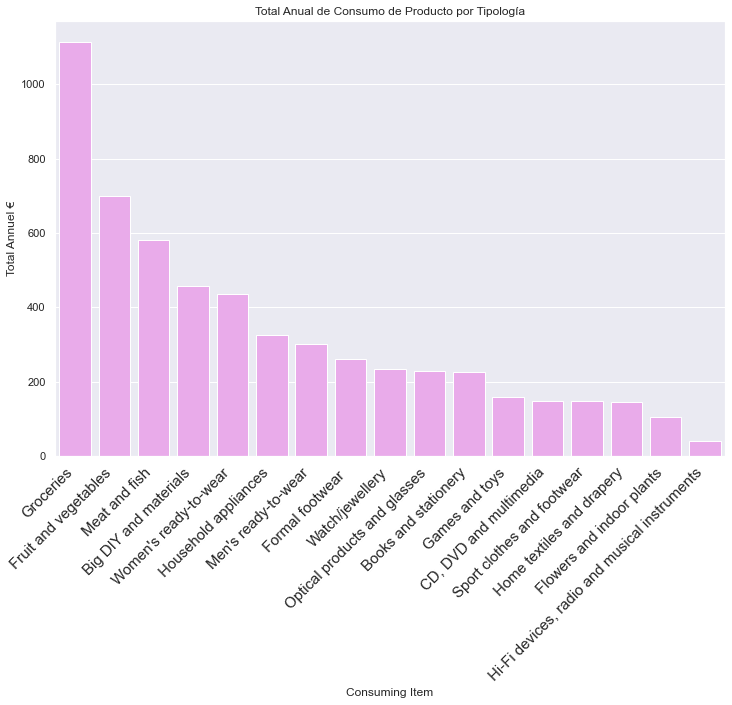

In [60]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(x='Consuming Item', y='Total Annuel €', data = Lyon_consumo, color = '#F3A1F4')
ax.set_title('Total Anual de Consumo de Producto por Tipología')
ax.set_xticklabels(labels = Lyon_consumo['Consuming Item'], rotation = 45, ha='right', fontsize=15)

ax

Aunque detallaremos el gráfico en la sección resultados, un análisis preliminar de éste nos indica que, de media, un hogar en Lyon gasta sobretodo en comida, como es lógico, y por otro lado hay una cierta inversión en materiales de construcción y bricolage y en ropa femenina.

### 3.3. Análisis demográfico:

Con el análisis demográfico, trataremos de establecer un perfil medio y crear un perfil objetivo a través de la observación de diferentes tablas demográficas:

· Veamos la evolución y la estructura de la población con datos del año 2017: 

In [61]:
Lyon_population = pd.read_excel('C:/Users/Fran/Documents/Poblacionlyon.xlsx')
Lyon_population

,Age,2007,%,2012,%.1,2017,%.2
0,Total,472331,100.0,496343,100.0,516092,100.0
1,0 - 14 years,71287,15.1,76735,15.1,79291,15.4
2,15 - 29 years,135991,28.8,145108,29.2,148880,28.8
3,30 - 44 years,100568,21.3,106288,21.4,110758,21.5
4,45 - 59 years,75889,16.1,76269,15.4,79454,15.4
5,60 - 74 years,49308,10.4,53712,10.8,58788,11.4
6,+ 75 years,39288,8.3,38231,7.7,38922,7.5


In [62]:
# Ordenamos de mayor a menor el total de población 2017 para ver las franjas de edad que más presencia tienen:

Lyon_population.sort_values(2017, ascending= False)

,Age,2007,%,2012,%.1,2017,%.2
0,Total,472331,100.0,496343,100.0,516092,100.0
2,15 - 29 years,135991,28.8,145108,29.2,148880,28.8
3,30 - 44 years,100568,21.3,106288,21.4,110758,21.5
4,45 - 59 years,75889,16.1,76269,15.4,79454,15.4
1,0 - 14 years,71287,15.1,76735,15.1,79291,15.4
5,60 - 74 years,49308,10.4,53712,10.8,58788,11.4
6,+ 75 years,39288,8.3,38231,7.7,38922,7.5


Podemos ver que nos encontramos ante una población relativamente joven, en constante aumento, donde la franja entre los 15 y los 29 tiene un peso importante en la ciudad, seguido de aquella población de edad media (30 - 44 años).

· Población por sexo:

In [63]:
Lyon_popgenre = pd.read_excel('C:/Users/Fran/Documents/poblaciónsexo.xlsx')
Lyon_popgenre

,Age,Men,%,Women,%.1
0,Total,241964,100.0,274128,100.0
1,0 - 14,40201,16.6,39090,14.3
2,15 - 29,68867,28.5,80013,29.2
3,30 - 44,55271,22.8,55488,20.2
4,45 - 59,38356,15.9,41097,15.0
5,60 - 74,25741,10.6,33046,12.1
6,75 - 89,11996,5.0,20785,7.6
7,+ 90,1532,0.6,4609,1.7


Vemos que hay una ligera desviación porcentual en favor del sexo femenino.

· Población según su categoría socioprofesional:

In [64]:
Lyon_popgenre = pd.read_excel('C:/Users/Fran/Documents/categoriasprof.xlsx')
Lyon_popgenre.sort_values(2017, ascending=False)

,Sector Prof.,2007,%,2012,%.1,2017,%.2
0,Total,401004,100.0,419561,100.0,436735,100.0
8,Without professional activity,86963,21.7,86906,20.7,94762,21.7
3,Collar and qualified workers,63542,15.8,75869,18.1,85534,19.6
7,Pensioners,78476,19.6,77999,18.6,79314,18.2
4,Technicians and associate professionals,69054,17.2,73428,17.5,75387,17.3
5,Staff members,62256,15.5,64567,15.4,61539,14.1
6,Factory worker,30638,7.6,29867,7.1,27662,6.3
2,"Liberal professionals, managers, shopkeepers",9979,2.5,10774,2.6,12486,2.9
1,Farmer,97,0.0,152,0.0,50,0.0


Podemos apreciar que del grueso de población, cerca del 21,7% no ejerce actividad profesional, seguido de un 20% aprox. de trabajadores cualificados. Por el otro lado, el sector de las profesiones liberales, managers y comerciantes y el sector de agricultores tienen una representación muy baja, con 2,9% del total el primero y el segundo no llegando ni a la unidad porcentual.

## 4. Resultados y discusión:

En primer lugar, el **análisis geográfico** nos ha llevado a constatar que Lyon tiene 9 distritos principales. 

Como podemos ver en las tablas, los distritos con más población son, por orden, el 3º, el 8º y el 7º, y los que menos población tienen son el 1º, el 2º y el 4º.

Todos los distritos aumentan su población con el paso de los años. Sin embargo, hay distritos que en la última década han sufrido un aumento bastante significativo, como el 3º y el 7º arrondissement, que han aumentado aproximadamente entre 13000 y 12000 individuos cada uno para el periodo analizado. Por otro lado, podemos ver que en el resto de distritos el crecimiento ha sido mucho menos progresivo, entre los 1000 y los 2000 habitantes aproximadamente, salvo en los distritos 2º, 5º, y 6º donde el aumento de la población para el periodo 2006 - 2015 se cuenta por centenas.

Respecto a la densidad de la población en cada uno de los distritos, vemos que el municipio que mayor densidad representa es el 1º arrondissement, que a su vez es el que menor área tiene. También es destacable el caso del 3º distrito, segundo en valores de densidad de población pese a que tiene un área bastante extendida. En el lado contrario, es el 5º distrito el que menos densidad por habitante tiene, seguido por el 7º y el 2º. 

En términos de área, el distrito más extenso es el 7º, seguido del 9º y del 8º. Los que menos superficie tienen son el 1º y el 4º.

En el **apartado económico**, podemos apreciar a través de la intepretación del archivo JSON de la ciudad que para el ratio solicitado, vemos que el top 10 de lugares que más podemos encontrar a lo largo y ancho de la ciudad es:

1. Restaurante de cocina francesa
2. Bar
3. Hotel
4. Panadería/Pastelería
5. Supermercado
6. Restaurante Japonés
7. Cafétería
8. Coffe Shop
9. Restaurante Típico Lyonés
10. Restaurante convencional


Cabe destacar que por limitaciones de la API FourSquare, existe disparidad entre los lugares recibidos para cada distrito. Así, podemos encontrar que para el 3º y el 6º tenemos casi 100 lugares, mientras que para el 8º recibimos 26, 19 para el 9º y solamente 3 resultados para el 5º distrito. No obstante, no hemos omitido estos datos de manera que podamos incluir estos distritos dentro del análisis, pese a tener menos información de sus lugares.

Dicho esto, si nos remitimos a las tablas de los lugares más comunes vemos que hay tipos de lugares que, en una posición u otra, se repiten en el top de la mayoría de distritos, como el restaurante de cocina francesa, el supermarket, etc. En este caso, es interesante ver qué clase de lugares se encuentran en solo un distrito, o que clase de lugar falta en uno de los distritos. Por ejemplo, podemos ver que el 5º no posee ningun restaurante de cocina francesa (aunque en este caso es debido a la falta de datos), o que el lugar más común en el 9º distrito son los hostales, seguido de sandwicherías y hoteles.

Por tanto, y en consecuencia, podemos ver como las 4 agrupaciones de los diferentes distritos atiende en cierto sentido a un criterio geográfico/demográfico, donde el 1º clúster representa a los distritos del centro-sur de la ciudad: 3º, 7º y 8º, los cuales registran el mayor número de habitantes y tienen una oferta basada en el sector servicios, donde la hostelería es una de las principales bazas, acompañado de los supermercados y algunas tiendas, como aquellas de servicios de telefonía movil en el 3º distrito o las tiendas de ropa femenina en el 8º distrito.

La segunda agrupación corresponde con el 5º distrito, ubicado al centro-oeste, del cual, dados los datos que poseemos no podemos deducir mucho. Sin embargo, vemos que de nuevo es el sector terciario el que tiene más peso en el distrito.

La tercera y la cuarta agrupación corresponden con los distritos centro-norte de la ciudad.

Encontramos en la tercera agrupación, un menor número de habitantes, pero sin embargo densidades relativas altas, incluida la del 1º arrondissement, que muestra una concentración enorme de personas, coincidiendo con el centro neurálgico de la ciudad. Vemos que, de nuevo, es el sector restauración y hostelería el que más lugares ocupa en el tejido empresarial de este clúster.

La cuarta corresponde al distrito más alejado de la ciudad, el 9º, el cuál posee además la densidad de población mas baja, en este clúster vemos una tendencia un poco más diferente que el resto, donde los lugares que encontramos con más frecuencia se reparten entre la restauración y las tiendas de diferentes productos y servicios.

En lo que respecta al análisis del tejido empresarial desde una visión más generalista, podemos apreciar que es el 3º distrito el que más empresas posee, con casi 5000, seguido del 2º y el 6º. Podemos ver que es el sector comercio, transportes y otros servicios el más desarrollado en todos los distritos y el sector primario (agricultura, etc) el menos desarrollado. Podemos apreciar también industria destacable en el 3º y el 7º distritos.
Respecto al sector de Administración Pública, educación, etc., apreciamos que tiene presencia destacable en todos los distritos, si bien, es de nuevo el 3º distrito el que más empresas de este tipo tiene, y el 4º distrito el que menos. En términos generales podemos decir que los distritos 3º, 2º, 6º y 7º presentan una red empresarial rica, donde destaca sobretodo, dado su peso en la economía en general, el sector servicios, pero que también representan niveles buenos de industria, salvo el caso del 2º distrito, que tiene un peso relativamente menor en este sector.
Por el otro lado, el 4º y 5º distrito presentan un nivel menor dentro de este tejido emrpesarial, con niveles mucho menos de representación en casi todos los 5 sectores expuesto. 

Por otro lado, en lo que respecta al consumidor potencial, vemos que en Lyon, el gasto anual de cada hogar va dirigido principalmente a la comida, luego a los bienes personales (ropa, cosmética, etc.) y en tercer lugar a la cultura y ocio, si bien este último valor ha decaído a lo largo de los últimos años un 17%. En cifras generales el gasto anual por hogar se mantiene estable a lo largo del lustro.
Dentro de la tipología de producto, otra vez es la comida el producto más consumido, seguido de materiales de construcción/bricolage y ropa femenina.

Siguiendo con el estudio del prototipo de consumidor potencial, el **análisis demográfico** nos muestra que en la ciudad hay una población relativamente joven, donde el 44,2% tiene menos de 29 años, y el 65,7% menos de 44 años. De hecho, es la franja de edad de 15 a 29 años aquella que representa el mayor valor dentro de la población. Respecto al género, la presencia del sexo femenino está varios puntos porcentuales por encima del masculino.
Dentro de esta población, vemos que en general las profesiones de salarios altos/medios ocupan una proporción importante en la tabla, si bien la gente que no ejerce actividad profesional (estudiantes, etc.) y los pensionistas ocupan el 1º y el 3º puesto respectivamente dentro de la tabla. Además, como mencionamos anteriormente, el sector de las profesiones liberales, managers y comerciantes y el sector de agricultores tienen una representación muy baja, con 2,9% del total el primero y el segundo no llegando ni a la unidad porcentual.

## 5. Conclusiones:

El objetivo del ejercicio era poder presentarle al cliente 4 opciones diferentes de dónde invertir, es por esto que consideramos oportuno usar las agrupaciones que hemos generado para determinar dónde y qué tipo de negocio abrir. 

Podemos apreciar que la primera agrupación coincide con los distritos más dinámicos, que más han crecido en los últimos años y que presentan un tejido empresarial más rico. Dentro de esto, y ateniéndonos a las estadísticas, vemos que el sector alimentario es siempre un valor seguro de inversión. Prestando atención a la disposición del clúster, podemos ver que el 8º distrito tiene menor densidad poblacional, lo que significa que está en expansión y que va camino de tener las cifras de sus compañeros de agrupación, por lo que sería interesante barajar la implantación de un negocio en este distrito, menos denso y en expansión.

El segundo y el cuarto clúster representan distritos aún en crecimiento, con tejidos empresariales menos densos que en las otra agrupaciones, por lo que podría representar buenas oportunidades de negocio. Sin embargo al tener menos densidad de población habría que considerar el esfuerzo extra que supondría atraer a los consumidores potenciales al negocio.

Por otro lado, el 3º clúster, que representa los distritos del centro, con altas densidades de población y una oferta relativamente grande de disversos establecimientos. En este caso, si bien se puede aprovechar la baza de la densidad de población, dado el área, habría que tener en cuenta que puede haber también una competencia mucho más fuerte.

Respecto a qué negocio montar, ateniéndonos a los datos, vemos que el sector alimentario es un valor seguro, dada la estabilidad que representa el gasto en alimentos a lo largo de los años. Dentro de esto, dado que la población es en términos generales joven y con un nivel adquisitivo medio/alto, podría barajarse, por un lado, supermercados especializados en determinados productos, en concreto en aquellos distritos que presenten una menor concentración de estos, o orientarse hacia la restauración, apostando por negocios que rompan con el esquema de restaurante de cocina francesa, el cuál tiene una presencia ya muy fuerte en la ciudad.